In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
X = iris.data
y = iris.target

In [ ]:
import numpy as np

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
def single_prediction(X, weights):
  return sigmoid(np.dot(X, weights))

In [ ]:
def predict(X, weights):
  return sigmoid(np.dot(X, weights))

In [ ]:
def logistic_loss(X, y, weights):
  y_pred = predict(X, weights)
  loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
  return loss

In [ ]:
def gradient(X, y, weights):
  m = len(X)
  y_pred = predict(X, weights)
  error = y_pred - y
  gradient = np.dot(X.T, error) / m
  return gradient

In [ ]:
def gradient_descent(X, y, weights, learning_rate, epochs):
  for epoch in range(epochs):
    gradient_ = gradient(X, y, weights);
    weights -= learning_rate * gradient_

In [ ]:
def make_binary_y(yn, value):
  for label in y:
    if label == value:
      yn.append(0)
    else:
      yn.append(1)
  yn = np.array(yn)

In [ ]:
num_features = 4
weights_0 = np.zeros(num_features)
weights_1 = np.zeros(num_features)
weights_2 = np.zeros(num_features)

In [ ]:
y0 = []
y1 = []
y2 = []

In [ ]:
make_binary_y(y0, 0)
make_binary_y(y1, 1)
make_binary_y(y2, 2)

In [ ]:
gradient_descent(X, y0, weights_0, 0.1, 1000)
gradient_descent(X, y1, weights_1, 0.1, 1000)
gradient_descent(X, y2, weights_2, 0.1, 1000)

In [ ]:
weights_0

array([-0.66192482, -2.13949569,  3.27571915,  1.49181455])

In [ ]:
weights_1

array([-0.87555727,  1.966527  , -0.6797497 ,  2.14061638])

In [ ]:
weights_2

array([ 2.90092759,  2.61229925, -3.89994583, -3.94848833])

In [ ]:
def all_predict(x):
  y0 = predict(x, weights_0)
  y1 = predict(x, weights_1)
  y2 = predict(x, weights_2)
  y_pred = [y0, y1, y2]
  min_ = min(y0, y1, y2)
  return y_pred.index(min_)

In [ ]:
y_pred = []
for i in X:
  y_pred.append(all_predict(i))

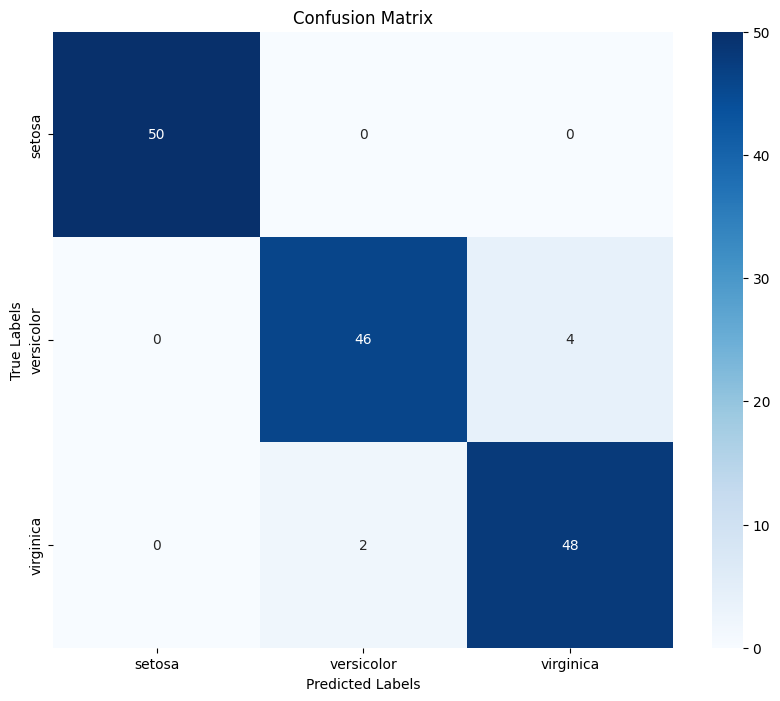

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y, y_pred)

precision = precision_score(y, y_pred, average='weighted')

recall = recall_score(y, y_pred, average='weighted')

f1 = f1_score(y, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-1 Score:", f1)

Accuracy: 0.96
Precision: 0.9604700854700855
Recall: 0.96
F-1 Score: 0.9599839935974389
